Last edit: June 29th, 2018

# Calculation of trap frequency

<div style="text-align: right;">
<font size="4">Editor: Ryuta Yamamoto</font>
</div>

### Load python modules for calculation of trap frequency

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import constants

# Mathmatics calculation
#from sympy import *
import sympy as sp
from sympy import pi, I, oo
from sympy import Rational
from sympy import Symbol, symbols
from sympy import sqrt, sin, cos, exp, log
from sympy import integrate
from sympy import Matrix, transpose
from sympy import Eq, Piecewise, Integral, Ne
from sympy import solve, simplify, diff, series, Poly
from sympy import lambdify
from sympy.plotting import plot, plot3d
from sympy import init_printing

init_printing()

In [2]:
plt.rcParams["font.size"] = 14
plt.rcParams['xtick.direction'] = 'in' # direction: in, out, or inout
plt.rcParams['ytick.direction'] = 'in' # direction: in, out, or inout
plt.rcParams['axes.linewidth'] = 1.5 # edge linewidth
plt.rcParams['xtick.major.size'] = 8 # major tick size in points
plt.rcParams['xtick.major.width'] = 1.5 # major tick width in points
plt.rcParams['xtick.top'] = True # draw ticks on the top side
plt.rcParams['ytick.major.size'] = 8 # major tick size in points
plt.rcParams['ytick.major.width'] = 1.5 # major tick width in points
plt.rcParams['ytick.right'] = True # draw ticks on the right side

In [17]:
lambda_L = 1064e-9
m87 = 87 * constants.m_u
Er = constants.h**2 / (2 * m87 * lambda_L**2)
s_max = 250e-6 * constants.k / Er
z = np.linspace(-1e-4, 1e-4, 1e4)

w0z = 40e-6

omega_tri = 3 / 2 * Er / constants.h * np.sqrt(s_max * np.exp(-2*z**2/w0z**2))

C:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


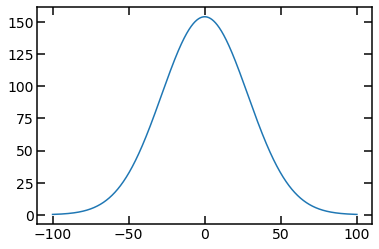

In [20]:
plt.plot(z*1e6, omega_tri*1e-3)

In [107]:
omega = np.linspace(0, 300e3, 1e4)
omega_z = 2 * np.pi * 1100 # ~2500Er
Tz = 30e-6
sigma = np.sqrt(2 * constants.k * Tz / (m87 * omega_z**2))

z2_tmp = -np.log((2 / 3 * constants.h * omega / Er)**2 / s_max) * w0z**2/2
z2 = np.sqrt(z2_tmp[z2_tmp>0])
P = np.exp(-z2**2/sigma**2) / (np.sqrt(np.pi) * sigma)

omega = omega[z2_tmp>0]

C:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
C:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


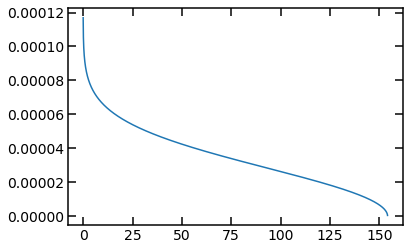

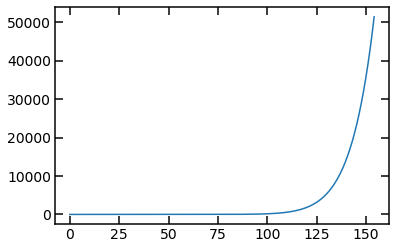

In [108]:
plt.figure()
plt.plot(omega*1e-3, z2)
plt.figure()
plt.plot(omega*1e-3, P)

In [109]:
sigma_sp = 10e3
f_Lorentz = 1 / np.pi * sigma_sp / (sigma_sp**2 + omega**2)

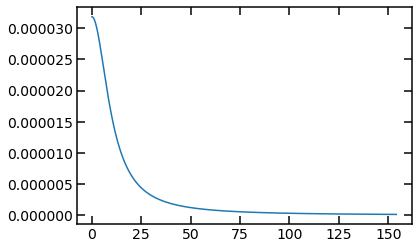

In [110]:
plt.plot(omega*1e-3, f_Lorentz)

In [111]:
con = np.convolve(P,f_Lorentz)
omega_con = np.linspace(-600e3, 600e3, 2e4-1)

C:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


ValueError: x and y must have same first dimension, but have shapes (19999,) and (10271,)

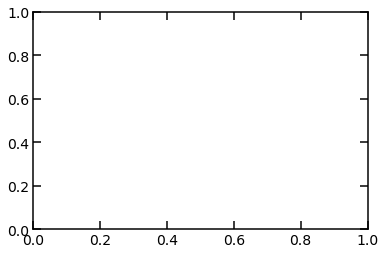

In [112]:
plt.plot(omega_con*1e-3, con)

In [113]:
P

array([0.00000000e+00, 1.79078610e-45, 1.84283405e-41, ...,
       5.11388727e+04, 5.12718264e+04, 5.14050998e+04])

In [101]:
z2_tmp

array([-1.06603877e-09, -1.06571871e-09, -1.06539858e-09, ...,
       -1.06539858e-09, -1.06571871e-09, -1.06603877e-09])

In [335]:
f = Symbol('f', real=True)
f_max = Symbol('f_{max}', positive=True)
Tz = Symbol('T_z', positive=True)
omega_z = Symbol('\omega_z', positive=True)
w0z = Symbol('w_{0z}', positive=True)

k = Symbol('k_L', positive=True)
s = Symbol('s_0', positive=True)

mass = symbols('m_{87}', positive=True)
hbar, kB = symbols('\hbar, k_B', positive=True)

In [344]:
sigma_dist = sqrt(2 * kB * Tz / (mass * omega_z**2))
sigma_dist

Er = hbar**2 * k**2 / (2*mass)

z_f = sqrt(-w0z**2/2 * log((Rational(2,3) * 2 * pi * f * hbar / Er)**2 / s))
P = Piecewise((0,  f<=0),
                      (exp(-z_f**2/sigma_dist**2) / (sqrt(pi) * sigma_dist),  f<=f_max),
                      (0, True))

P

⎧                                  0                                        fo
⎪                                                                             
⎪                                                    ⎛    2  2       2⎞       
⎪                                2              2    ⎜64⋅π ⋅f ⋅m_{87} ⎟       
⎪                        \omega_z ⋅m_{87}⋅w_{0z} ⋅log⎜────────────────⎟       
⎪                                                    ⎜      2    4    ⎟       
⎪                                                    ⎝ 9⋅\h̅ ⋅k_L ⋅s₀ ⎠       
⎨                        ──────────────────────────────────────────────       
⎪              ________                    4⋅T_z⋅k_B                          
⎪√2⋅\omega_z⋅╲╱ m_{87} ⋅ℯ                                                     
⎪──────────────────────────────────────────────────────────────────────  for f
⎪                                _____   _____                                
⎪                         2⋅√π⋅╲╱ T_z ⋅╲╱ k_B       

In [352]:
P_val = P.subs([[kB, constants.k], [hbar, constants.hbar], [mass, 87 * constants.m_u],
                        [w0z, 40e-6], [k, 2*np.pi / 1064e-9],
                        [s, 2500], [omega_z, 2 * np.pi * 1.1e3], [Tz, 30e-6], [f_max, 150e3]
                       ]).evalf()
P_val

⎧                   0                         for f ≤ 0    
⎪                                                          
⎪                        13.3290455083315                  
⎨4.42085902430369e-65⋅│f│                  for f ≤ 150000.0
⎪                                                          
⎪                   0                         otherwise    
⎩                                                          

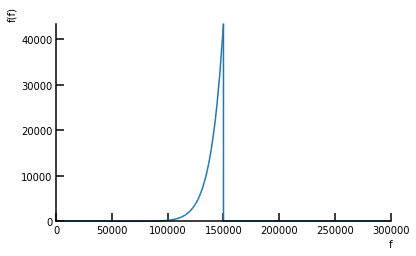

In [353]:
# plot(sin(x), (x, -pi, pi), adaptive=False, line_color=lambda a: sin(a))
sp.plotting.plot(P_val, (f, 0, 300e3))

In [354]:
f_tmp = -w0z**2/2 * log((Rational(2,3) * 2 * pi * f * hbar / Er)**2 / s)
f_tmp_val = f_tmp.subs([[kB, constants.k], [hbar, constants.hbar], [mass, 87 * constants.m_u],
                        [w0z, 40e-6], [k, 2*np.pi / 1064e-9],
                        [s, 2500], [omega_z, 2 * np.pi * 1.1e3], [Tz, 30e-6]
                       ]).evalf()
f_tmp_val

C:\Anaconda3\envs\py36\lib\site-packages\sympy\plotting\experimental_lambdify.py:233: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn('The evaluation of the expression is'


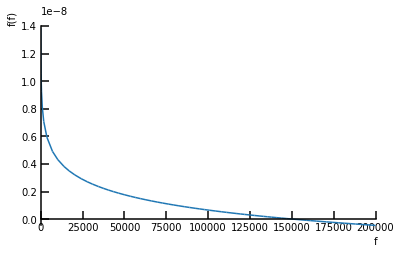

In [355]:
sp.plotting.plot(f_tmp_val, (f, 0, 200e3))

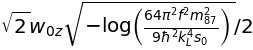

In [356]:
z_f

In [358]:
gamma = Symbol('\gamma', positive=True)
f_int = Symbol('f^\prime', real=True)
f_tmp = (1 / (gamma**2 + (f-f_int)**2))
# f_tmp = exp(-(f-f_int)**2/gamma**2)

f_sp = integrate(P * f_tmp, (f, 0, f_max))

KeyboardInterrupt: 

In [ ]:
f_sp_val = f_sp.subs([[kB, constants.k], [hbar, constants.hbar], [mass, 87 * constants.m_u],
                                [w0z, 40e-6], [k, 2*np.pi / 1064e-9],
                                [s, 2500], [omega_z, 2 * np.pi * 1.1e3], [Tz, 30e-6], [gamma, 1000], [f_max, 150e3],
                               ]).evalf()
f_sp_val

KeyboardInterrupt: 

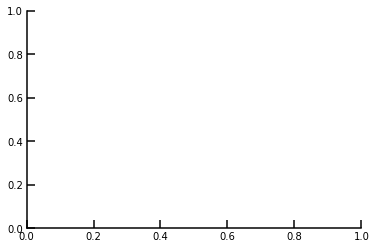

In [295]:
plot(f_sp_val, (f_int, -100e3, 300e3))

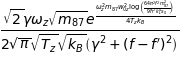

In [259]:
P * gamma / (gamma**2 + (f-f_int)**2)

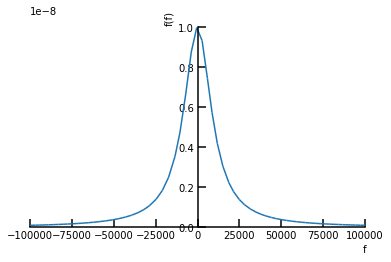

In [263]:
f_tmp = (1 / (gamma**2 + (f-f_int)**2))
f_tmp_val = f_tmp.subs([[gamma, 10e3], [f_int, 0]])

plot(f_tmp_val, (f, -100e3, 100e3))

In [307]:

x, a = symbols('x, a')

Eq(Integral(x**a, x), Piecewise((x**(a + 1)/(a + 1), Ne(a, -1)), (log(x), True)))


          ⎧ a + 1            
⌠         ⎪x                 
⎮  a      ⎪──────  for a ≠ -1
⎮ x  dx = ⎨a + 1             
⌡         ⎪                  
          ⎪log(x)  otherwise 
          ⎩                  

In [331]:
or(f<=f_max, f>=0)

SyntaxError: invalid syntax (<ipython-input-331-7d640416a02f>, line 1)

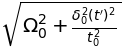

In [98]:
Omega0, delta0 = symbols("\Omega_0, \delta_0", positive=True)
t, t0 = symbols("t, t_0", positive=True)
t_int = Symbol("t^\prime", real=True)

delta = delta0 * t_int / t0
Omega = sqrt(Omega0**2 + delta**2)
Omega

In [99]:
expr = exp(I * integrate(Omega, (t_int, -t0/2, t0/2)))
expr

In [100]:
cos_func = sqrt((1 + delta/Omega)/2)
sin_func = sqrt((1 - delta/Omega)/2)

c1 = Omega.subs([[t_int, t0/2]]) / Omega0 * (expr * cos_func.subs([[t_int, -t0/2]]) * cos_func.subs([[t_int, t0/2]]) + 1/expr * cos_func.subs([[t_int, t0/2]]) * cos_func.subs([[t_int, -t0/2]]) )

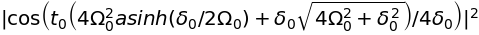

In [114]:
Norm = c1.subs([[t, -t0]]).expand()
# c1 = c1/abs(Norm)
tmp = abs(c1.expand().simplify())**2
tmp

In [130]:
c1_rate = tmp
c1_rate_val = c1_rate.subs([[Omega0, 2 * np.pi * 10e3], [delta0, 2 * np.pi * 10e3]]).evalf()

c1_rate_val

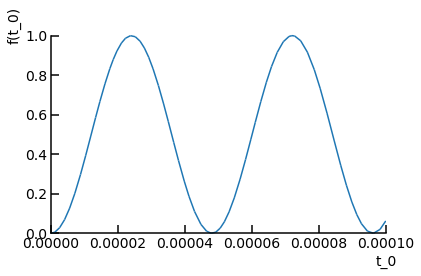

In [131]:
plot(1-c1_rate_val, (t0, 0, 1e-4))

In [129]:
tmp = c1 * (cos(delta.subs([[t_int, t0/2]]) * t0/2 / 2) - I * sin(delta.subs([[t_int, t0/2]]) * t0/2 / 2))
tmp = abs(tmp.expand().simplify())**2

In [259]:
omega = 2 * np.pi * np.linspace(-200e3, 200e3, 1e4)

C:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


In [455]:
m87 = 87 * constants.m_u
Tz = 50e-6
w0z = 40e-6
omega_z = 2 * np.pi * 1.1e3
omega_max = 2 * np.pi * 130e3

alpha = m87 * omega_z**2 * w0z**2 / (2 * constants.k * Tz)
norm = np.sqrt(np.pi / alpha)

P = (omega/omega_max)**(alpha)
P[omega > omega_max] = 0

C:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in power
  # Remove the CWD from sys.path while we load stuff.


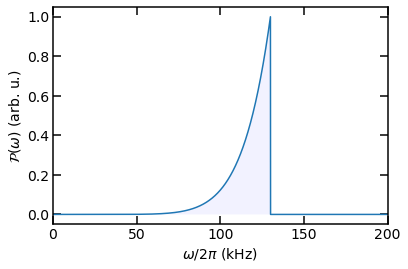

In [511]:
# plt.figure(dpi=150)
plt.plot(omega*1e-3 / (2 * np.pi), P)
plt.fill_between(omega*1e-3 / (2 * np.pi), 0, P, facecolor='#aaaaff',alpha=0.15)

plt.xlabel(r"$\omega/2\pi$ (kHz)")
plt.ylabel(r"$\mathcal{P}(\omega)$ (arb. u.)")
plt.xlim([0, 200])

# plt.savefig('Distribution.pdf')


In [457]:
omega0 =  2 * np.pi * np.linspace(-250e3, 250e3, 1e4)
gamma0 = 2 * np.pi * 5e3

F = 1 / (1 + (omega0/gamma0)**2)

C:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


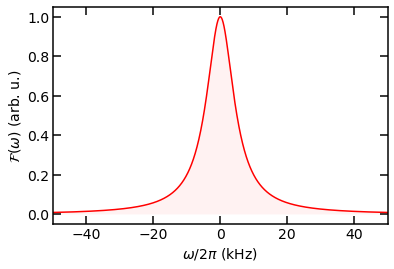

In [510]:
# plt.figure(dpi=150)
plt.plot(omega0*1e-3 / (2 * np.pi), F, 'r-')
plt.fill_between(omega0*1e-3 / (2 * np.pi), 0, F, facecolor='#ffaaaa',alpha=0.15)
plt.xlabel(r"$\omega/2\pi$ (kHz)")
plt.ylabel(r"$\mathcal{F}(\omega)$ (arb. u.)")

plt.xlim([-50, 50])

# plt.savefig('LorentzSpectrum.pdf')

In [459]:
from scipy import integrate

def dist_P(omega):
    if omega > omega_max:
        return 0
    elif omega < 0:
        return 0
    else:
        return (omega/omega_max)**(alpha)
    
def Lorentz(omega, omega0):
    return 1 / (1 + ((omega - omega0)/gamma0)**2)


def conv_dist(omega):
    return integrate.quad(lambda x, omega: dist_P(x) * Lorentz(x, omega), 0, omega_max, args=omega)[0]

vec_fun = np.vectorize(conv_dist)

#     integrate.quad(lambda x, c : 1/(x**3-2*x-c), 0, 2, args=5)

F_conv_p = vec_fun(omega)
F_conv_p = F_conv_p / np.max(F_conv_p)

F_conv_n = vec_fun(np.flip(omega))
F_conv_n = F_conv_n / np.max(F_conv_n)
F_carrier = Lorentz(omega, 0)

bg = 0.0
alpha_c = 0.75 - bg
alpha_p = 0.3 - bg
alpha_n = 0.4 - bg
F_conv_t = alpha_c * F_carrier + alpha_p * F_conv_p + alpha_n * F_conv_n + bg

F_conv_t = F_conv_t / np.max(F_conv_t)


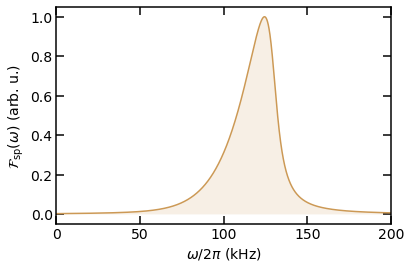

In [508]:
# plt.figure(dpi=150)
plt.plot(omega*1e-3 / (2 * np.pi), F_conv_p, '-', c='#cc9955')
# plt.plot(omega*1e-3 / (2 * np.pi), F_conv_n, 'r-')
# plt.plot(omega*1e-3 / (2 * np.pi), F_conv_t, '-', c='#559955')
plt.fill_between(omega*1e-3 / (2 * np.pi), 0, F_conv_p, facecolor='#cc9955',alpha=0.15)

plt.xlabel(r"$\omega/2\pi$ (kHz)")
plt.ylabel(r"$\mathcal{F}_\mathrm{sp}(\omega)$ (arb. u.)")

plt.xlim([0, 200])
# plt.ylim([0.1, 0.8])

# plt.savefig('ConvSpectrum.pdf')


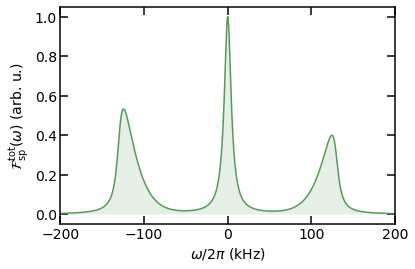

In [509]:
# plt.figure(dpi=150)
plt.plot(omega*1e-3 / (2 * np.pi), F_conv_t, '-', c='#559955')
plt.fill_between(omega*1e-3 / (2 * np.pi), 0, F_conv_t, facecolor='#559955',alpha=0.15)

plt.xlabel(r"$\omega/2\pi$ (kHz)")
plt.ylabel(r"$\mathcal{F}^\mathrm{tot}_\mathrm{sp}(\omega)$ (arb. u.)")

plt.xlim([-200, 200])
# plt.ylim([0.1, 0.8])

# plt.savefig('FullSpectrum.pdf')


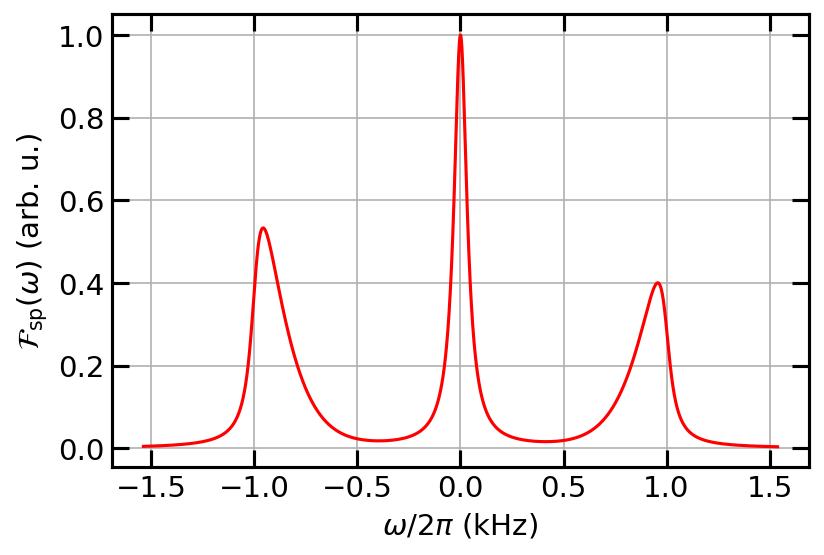

In [442]:
plt.figure(dpi=150)
plt.plot(omega / omega_max, F_conv_t, 'r-')
plt.xlabel(r"$\omega/2\pi$ (kHz)")
plt.ylabel(r"$\mathcal{F}_\mathrm{sp}(\omega)$ (arb. u.)")
plt.grid()
# plt.savefig('test.pdf')
# plt.xlim([-200, 200])
# plt.ylim([0.1, 0.8])

In [503]:
np.sqrt(1 - alpha_p/alpha_n)

In [512]:
alpha_p/alpha_n